In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [2]:
df = pd.read_csv('Downloads/data_cleaned.csv')
df.head()
x = df.drop(['Survived'],axis=1)
y=df['Survived']

In [3]:
scaler = MinMaxScaler()
scaler1 = StandardScaler()
df_scaled = scaler.fit_transform(x)

In [4]:
x = pd.DataFrame(df_scaled,columns=x.columns)

In [5]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=56,stratify=y)

In [6]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import f1_score,confusion_matrix

In [7]:
model = KNeighborsClassifier(n_neighbors=9)
model.fit(x_train, y_train)  

NameError: name 'KNeighborsClassifier' is not defined

In [8]:
y_pred = model.predict(x_test)

NameError: name 'model' is not defined

In [9]:
f1_score(y_test,y_pred)

NameError: name 'y_pred' is not defined

In [10]:
confusion_matrix(y_test,y_pred)

NameError: name 'y_pred' is not defined

In [11]:
def Elbow(K):
    #initiating empty list
    test_error = []
   
    #training model for evey value of K
    for i in K:
        #Instance oh KNN
        clf = KNN(n_neighbors = i)
        clf.fit(x_train, y_train)
        # Appending F1 scores to empty list claculated using the predictions
        tmp = clf.predict(x_test)
        tmp = f1_score(tmp,y_test)
        error = 1-tmp
        test_error.append(error)
    
    return test_error

In [12]:
k = range(5,20,2)

In [13]:
test = Elbow(k)

Text(0.5, 1.0, 'Elbow Curve for test')

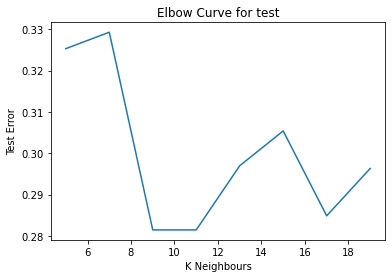

In [14]:
plt.plot(k,test)
plt.xlabel('K Neighbours')
plt.ylabel('Test Error')
plt.title('Elbow Curve for test')

In [15]:
from scipy import sparse

In [4]:
ratings = pd.read_csv('ratings.csv')
movies = pd.read_csv('movies.csv')
ratings=pd.merge(movies,ratings).drop(['genres','timestamp'],axis=1)
print(ratings.shape)
ratings.head(20)

(100836, 4)


,movieId,title,userId,rating
0,1,Toy Story (1995),1,4.0
1,1,Toy Story (1995),5,4.0
2,1,Toy Story (1995),7,4.5
3,1,Toy Story (1995),15,2.5
4,1,Toy Story (1995),17,4.5
5,1,Toy Story (1995),18,3.5
6,1,Toy Story (1995),19,4.0
7,1,Toy Story (1995),21,3.5
8,1,Toy Story (1995),27,3.0
9,1,Toy Story (1995),31,5.0


In [5]:
ratings.isnull().sum()

movieId    0
title      0
userId     0
rating     0
dtype: int64

In [46]:
user_ratings = ratings.pivot_table(columns = ['title'],values='rating' ,index = ['userId'])
user_ratings.shape

(610, 9719)

In [47]:
user_ratings = user_ratings.dropna(thresh=10,axis=1).fillna(0,axis=1)

In [48]:
user_ratings.head()

title,"'burbs, The (1989)",(500) Days of Summer (2009),10 Cloverfield Lane (2016),10 Things I Hate About You (1999),"10,000 BC (2008)",101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),12 Angry Men (1957),12 Years a Slave (2013),127 Hours (2010),...,Zack and Miri Make a Porno (2008),Zero Dark Thirty (2012),Zero Effect (1998),Zodiac (2007),Zombieland (2009),Zoolander (2001),Zootopia (2016),eXistenZ (1999),xXx (2002),¡Three Amigos! (1986)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
user_ratings.shape

(610, 2269)

In [51]:
corrMatrix = user_ratings.corr(method='pearson')
corrMatrix.head(100)

title,"'burbs, The (1989)",(500) Days of Summer (2009),10 Cloverfield Lane (2016),10 Things I Hate About You (1999),"10,000 BC (2008)",101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),12 Angry Men (1957),12 Years a Slave (2013),127 Hours (2010),...,Zack and Miri Make a Porno (2008),Zero Dark Thirty (2012),Zero Effect (1998),Zodiac (2007),Zombieland (2009),Zoolander (2001),Zootopia (2016),eXistenZ (1999),xXx (2002),¡Three Amigos! (1986)
title,,,,,,,,,,,,,,,,,,,,,
"'burbs, The (1989)",1.000000,0.063117,-0.023768,0.143482,0.011998,0.087931,0.224052,0.034223,0.009277,0.008331,...,0.017477,0.032470,0.134701,0.153158,0.101301,0.049897,0.003233,0.187953,0.062174,0.353194
(500) Days of Summer (2009),0.063117,1.000000,0.142471,0.273989,0.193960,0.148903,0.142141,0.159756,0.135486,0.200135,...,0.374515,0.178655,0.068407,0.414585,0.355723,0.252226,0.216007,0.053614,0.241092,0.125905
10 Cloverfield Lane (2016),-0.023768,0.142471,1.000000,-0.005799,0.112396,0.006139,-0.016835,0.031704,-0.024275,0.272943,...,0.242663,0.099059,-0.023477,0.272347,0.241751,0.195054,0.319371,0.177846,0.096638,0.002733
10 Things I Hate About You (1999),0.143482,0.273989,-0.005799,1.000000,0.244670,0.223481,0.211473,0.011784,0.091964,0.043383,...,0.243118,0.104858,0.132460,0.091853,0.158637,0.281934,0.050031,0.121029,0.130813,0.110612
"10,000 BC (2008)",0.011998,0.193960,0.112396,0.244670,1.000000,0.234459,0.119132,0.059187,-0.025882,0.089328,...,0.260261,0.087592,0.094913,0.184521,0.242299,0.240231,0.094773,0.088045,0.203002,0.083518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Almost Famous (2000),0.099554,0.209549,0.032088,0.296727,0.134434,0.118628,0.242958,0.079158,0.005092,0.051279,...,0.244619,0.085395,0.072505,0.221259,0.126008,0.362571,0.011577,0.208008,0.186599,0.147413
Along Came Polly (2004),0.027287,0.282426,0.113213,0.193085,0.162678,0.180259,0.112928,0.121704,0.125792,0.124032,...,0.173133,0.160430,0.029076,0.189165,0.166278,0.309183,0.078468,-0.036498,0.231566,0.025928
Along Came a Spider (2001),0.064762,-0.003205,0.016372,0.085365,-0.018241,0.080388,0.094016,-0.016678,0.079375,-0.028052,...,0.115347,0.093774,0.085286,0.150757,0.052144,0.174489,0.014189,0.025327,0.233244,0.043581


In [52]:
def get_similar(movie_name,rating):
    similar_ratings = corrMatrix[movie_name]*(rating-2.5)
    similar_ratings = similar_ratings.sort_values(ascending=False)
    return similar_ratings 

In [53]:
get_similar('Aviator, The (2004)',4)

title
Aviator, The (2004)                                                   1.500000
Flags of Our Fathers (2006)                                           0.718502
Ray (2004)                                                            0.714415
Letters from Iwo Jima (2006)                                          0.695035
Zodiac (2007)                                                         0.687990
                                                                        ...   
Specialist, The (1994)                                               -0.062114
Drop Zone (1994)                                                     -0.065460
Englishman Who Went Up a Hill But Came Down a Mountain, The (1995)   -0.067328
Tarzan (1999)                                                        -0.070005
Ben-Hur (1959)                                                       -0.076887
Name: Aviator, The (2004), Length: 2269, dtype: float64

In [54]:
for movie,rating in action_lover:
    print(rating)

5
4
2
4


In [55]:
similar_movies = pd.DataFrame()

In [56]:
similar_movies.append(get_similar(movie,rating),ignore_index=True)

C:\Users\Barath Murugan\AppData\Local\Temp\ipykernel_20992\3965707625.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  similar_movies.append(get_similar(movie,rating),ignore_index=True)


title,"2 Fast 2 Furious (Fast and the Furious 2, The) (2003)",xXx (2002),30 Days of Night (2007),Snakes on a Plane (2006),Die Another Day (2002),"Fast and the Furious, The (2001)",Kung Fu Hustle (Gong fu) (2004),S.W.A.T. (2003),Wanted (2008),Rat Race (2001),...,Arsenic and Old Lace (1944),"Philadelphia Story, The (1940)",Hoop Dreams (1994),"Madness of King George, The (1994)",Like Water for Chocolate (Como agua para chocolate) (1992),"English Patient, The (1996)","Postman, The (Postino, Il) (1994)","Piano, The (1993)",Crimson Tide (1995),Clear and Present Danger (1994)
0,1.5,0.805254,0.773765,0.770573,0.768192,0.749498,0.737842,0.72879,0.726768,0.725977,...,-0.055758,-0.056396,-0.05644,-0.056874,-0.05919,-0.059655,-0.063517,-0.073868,-0.078725,-0.089795


In [59]:
action_lover = [("Amazing Spider-Man, The (2012)",5),("Mission: Impossible III (2006)",4),("Toy Story 3 (2010)",2),("2 Fast 2 Furious (Fast and the Furious 2, The) (2003)",4)]
similar_movies = pd.DataFrame()

for movie,rating in action_lover:
    similar_movies = similar_movies.append(get_similar(movie,rating),ignore_index=True)
similar_movies.head(10)
similar_movies.sum().sort_values(ascending=False).head(10)
    


C:\Users\Barath Murugan\AppData\Local\Temp\ipykernel_20992\301054011.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  similar_movies = similar_movies.append(get_similar(movie,rating),ignore_index=True)
C:\Users\Barath Murugan\AppData\Local\Temp\ipykernel_20992\301054011.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  similar_movies = similar_movies.append(get_similar(movie,rating),ignore_index=True)
C:\Users\Barath Murugan\AppData\Local\Temp\ipykernel_20992\301054011.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  similar_movies = similar_movies.append(get_similar(movie,rating),ignore_index=True)
C:\Users\Barath Murugan\AppData\Local\Temp\ipykernel_20992\301054011.py:5: FutureWarning: The frame.append method is d

title
Amazing Spider-Man, The (2012)                           3.233134
Mission: Impossible III (2006)                           2.874798
2 Fast 2 Furious (Fast and the Furious 2, The) (2003)    2.701477
Over the Hedge (2006)                                    2.229721
Crank (2006)                                             2.176259
Mission: Impossible - Ghost Protocol (2011)              2.159666
Hancock (2008)                                           2.156098
The Amazing Spider-Man 2 (2014)                          2.153677
Hellboy (2004)                                           2.137518
Snakes on a Plane (2006)                                 2.137396
dtype: float64